Natural Language Processing on Yelp Dataset

In [1]:
#Data Analysis on a small Dataset

In [2]:
#import library

In [1]:
import pandas as pd

# For the Stop Words
from nltk.corpus import stopwords

# Convert the Words into Count Vectpr 
from sklearn.feature_extraction.text import CountVectorizer


# Train Test Split
from sklearn.model_selection import train_test_split

# Model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression

# For Report 
from sklearn.metrics import confusion_matrix, classification_report


import pandas as pd
import string
import seaborn as sns


%matplotlib inline

Knowing the Dataset and Exploratry Data Analysis

In [2]:
df = pd.read_csv('C:/AIT 590/Sree-Final Project/yelp_review.csv/yelp_review.csv')

In [8]:
df2 = df[['text','stars']].copy()

In [9]:
df2= df2.sample(10)

In [10]:
df2.head(10)

,text,stars
1455347,"Food was amazing. Server, Nikki, was attentive...",5
3286033,buyer beware.....esther has sold her business....,1
2086964,Cyclone Las Vegas is THE place to be...the ins...,5
2612351,What a delight to deal with this nursery. Wor...,5
3260119,"Both of my children, 10 and 6 yrs old, have be...",5
832552,Dunkin Donuts quality food here. Microwaved e...,2
1976739,This is seriously the worst Chinese food I hav...,1
389442,Just got told my order couldn't be taken at at...,1
2917649,Joe's Farm Grill features everything that is A...,5
1165007,We were going to a show in the Trop so we chos...,2


In [5]:
df.head(10)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0
5,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2
7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0
8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0
9,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0


In [6]:
df.describe()

,stars,useful,funny,cool
count,5.261668e+06,5.261668e+06,5.261668e+06,5.261668e+06
mean,3.727739e+00,1.385085e+00,5.091961e-01,5.860917e-01
std,1.433593e+00,4.528727e+00,2.686168e+00,2.233706e+00
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,3.364000e+03,1.481000e+03,1.105000e+03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         int64
funny          int64
cool           int64
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [8]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [7]:
df1 = df.sample(20000)   #Performing Analysis on a sample of 20000 rows in the data

In [8]:
df1.head(10)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
4914628,V5WT8gF3QSnvfzSNhKnfLA,ebt8wsJ6YLnoEbj0N_CgNw,mOdopeYLsXyQ07HWgyJPwg,4,2016-12-10,"As mentioned in other reviews, very sweet and ...",0,1,0
433208,cdeOLduXXrDu0O0703UzBA,v25smpA2i9dGQ9gqLu9cQQ,KC03xsB1SdgRyxSfQiJNwA,5,2016-09-22,A big thank you to the staff and doctors of Sa...,2,1,3
5091481,rBTQIaHbvv_shx2Ysp4mQg,MYZG6m1XiCyLplx4BxrIKw,JmI9nslLD7KZqRr__Bg6NQ,1,2015-05-21,This airport needs some serious help with effi...,0,0,0
3567908,VpkZqGRXM-fo2KbUgE2Qbg,PBwl0eCQ5a-BmXMA48dpow,VGhyoDJRrebP8ZKWx9L8Wg,4,2015-08-19,I ordered the Mediterranean salad and chicken ...,0,0,0
2394061,yz-2I6hFDw2zwLfihGe9Lg,Awl-N_oHohlw8FBuFPdwKg,zhoNuaWrB125_LRRVPWMSQ,5,2017-02-07,Fantastic experience! The food and service wer...,0,0,0
1519356,MJLH5XMKxnneFTcTUi8PEQ,8tZYX06vR99kFLu5lCyuKA,2Gh1Etnpn_BDy72hOXmCtg,5,2015-02-08,The owners and waiters\/waitress are very frie...,1,0,0
4529435,SlfyCzUVQgdlmsxqJ0EibQ,j7l20dPtVFBjMgmia4Qymw,drIFrAyZnyismS1ArZlmAg,1,2015-01-11,Not wheelchair accessible and no handicap park...,2,1,0
4810099,YW03XPfgDDFydi0Vt41r9w,4guhHcnzrximsz-DeEvskg,Jt28TYWanzKrJYYr0Tf1MQ,2,2012-08-07,First of all this place is WAY too loud. Don't...,0,0,0
4923512,cDm4rb0aYUnobX9x2JDjIg,OXuToHJF6vYo3dxS7VYfWA,Xo1LNzhnwE-ilqsM3ybs9Q,4,2016-09-21,Nice place. They have this salted cheese green...,1,1,1
336199,jvkepCFILbFdSqmRQSuP9Q,M-3zkox30HEPMtKw8HyG7Q,NFOj3uboFzeNF5X-dWUd_w,3,2013-04-29,We stayed at Harrah's and ate lunch at Ming's ...,1,0,0


In [9]:
df1.describe()

,stars,useful,funny,cool
count,20000.000000,20000.00000,20000.000000,20000.000000
mean,3.717000,1.41095,0.503800,0.594900
std,1.438337,4.54448,1.972734,2.136685
min,1.000000,0.00000,0.000000,0.000000
25%,3.000000,0.00000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000
75%,5.000000,2.00000,0.000000,1.000000
max,5.000000,463.00000,77.000000,91.000000


In [10]:
df1.shape

(20000, 9)

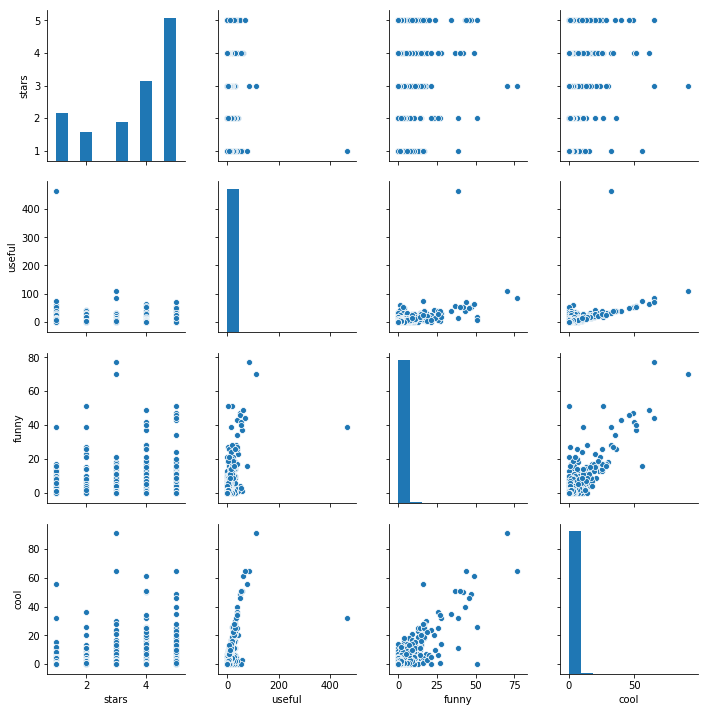

In [11]:
sns.pairplot(df1)   #Plot the data

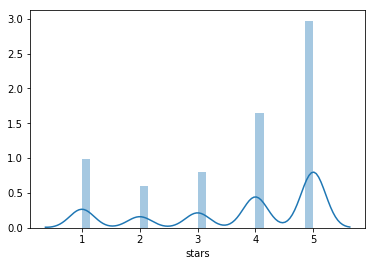

In [12]:
sns.distplot(df1["stars"])

In [13]:
#5 star ratings are maximum according to the above graph

In [14]:
#How many poeple gave how many stars
df1["stars"].value_counts()

5    8487
4    4712
1    2825
3    2280
2    1696
Name: stars, dtype: int64

In [15]:
#Maximum people gave 5 star ratings

Text(0.5, 1.0, 'Ratings vs Year ')

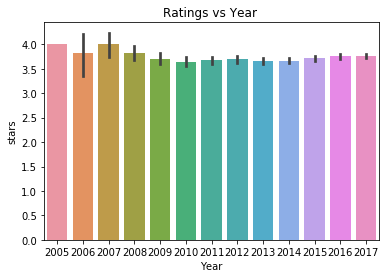

In [16]:
import matplotlib.pyplot as plt

df1["date"]= pd.to_datetime(df1["date"]).dt.date
df1.set_index('date').head(1)
df1["Year"] = pd.to_datetime(df1["date"]).dt.year
sns.barplot(x=df1["Year"], y=df1["stars"], data=df1)
plt.title("Ratings vs Year ")

176

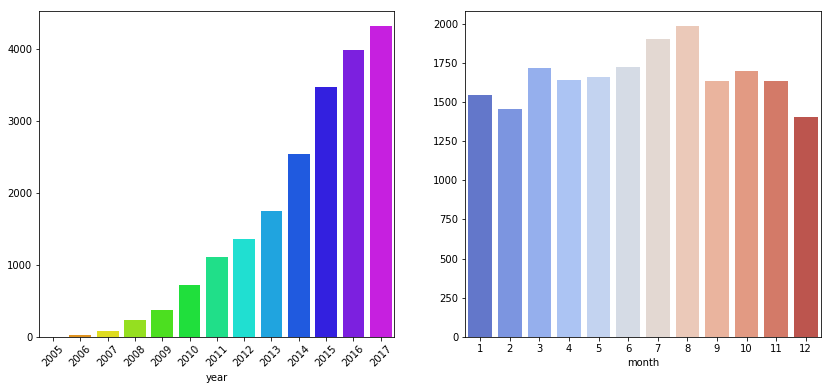

In [17]:
# Review distribution according to the year and month
import gc
df1['date'] = pd.to_datetime(df1['date'])
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month

f,ax = plt.subplots(1,2, figsize = (14,6))
ax1,ax2 = ax.flatten()
cnt = df1.groupby('year').count()['stars'].to_frame()
sns.barplot(cnt.index, cnt['stars'],palette = 'gist_rainbow', ax=ax1)
ax1.set_ylabel('')

for ticks in ax1.get_xticklabels():
    ticks.set_rotation(45)

cnt = df1.groupby('month').count()['stars'].to_frame()
sns.barplot(cnt.index, cnt['stars'],palette = 'coolwarm', ax = ax2)
ax2.set_ylabel('')
gc.collect()

Observation :

Above figure shows that 2005 onwards the number of users providing the reviews on yelp increased drastically

In the month of August maximum reveiws are given by users which implies most
of the users in the month of November are involved in yelp businesses

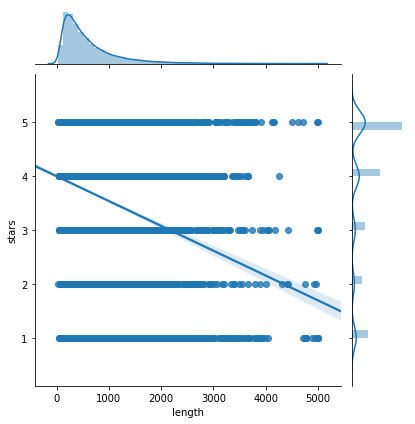

In [18]:
import matplotlib.pyplot as plt

df1["date"]= pd.to_datetime(df1["date"]).dt.date
df1.set_index('date').head(1)

df1["month"] = pd.to_datetime(df1["date"]).dt.month
df1["Year"] = pd.to_datetime(df1["date"]).dt.year

df1["length"] = df1["text"].apply(len)
sns.jointplot(x=df1["length"],
              y=df1["stars"],
              data=df1, kind='reg')

In [19]:
#as the length of the text Increases the Rating is decreasing

7

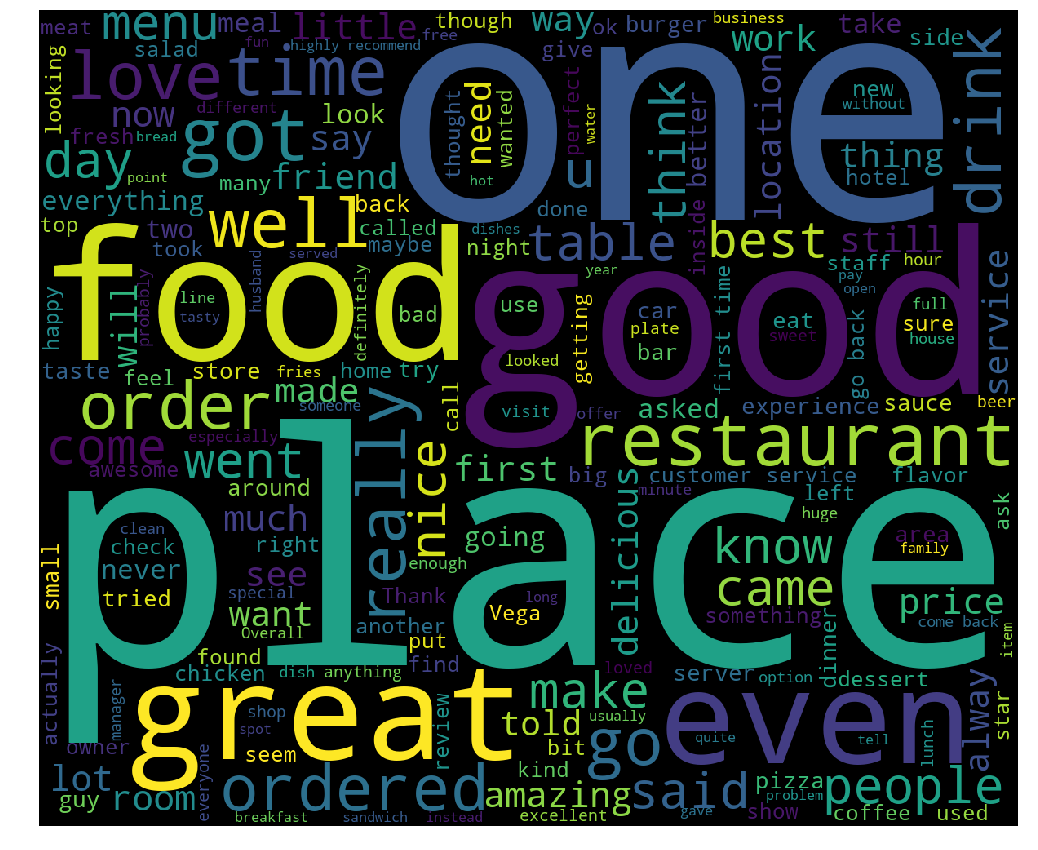

In [20]:
#WordCloud for Review text
from wordcloud import WordCloud
cloud = WordCloud(width=1200, height= 1000,max_words= 200).generate(' '.join(df1['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');
gc.collect()

Observation :

Right now the above wordcloud does not make sense since the text review has lots of stop words which has high 
number of occurance. But ignoring the stopwords, we see words like restaurent, love and 
drink are used majority of the times which implies that most of the reveiws are related to restaurants or 
food related business.

NLP MODEL

In [21]:
# Let us look at the count of stopwords present in the review text
stop = stopwords.words('english')

df1['stopwords'] = df1['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df1[['text','stopwords']].head()

,text,stopwords
4914628,"As mentioned in other reviews, very sweet and ...",29
433208,A big thank you to the staff and doctors of Sa...,41
5091481,This airport needs some serious help with effi...,45
3567908,I ordered the Mediterranean salad and chicken ...,54
2394061,Fantastic experience! The food and service wer...,17


In [22]:

# Let us look at the count of numerics present in the review text
df1['numerics'] = df1['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df1[['text','numerics']].head()

,text,numerics
4914628,"As mentioned in other reviews, very sweet and ...",0
433208,A big thank you to the staff and doctors of Sa...,0
5091481,This airport needs some serious help with effi...,0
3567908,I ordered the Mediterranean salad and chicken ...,1
2394061,Fantastic experience! The food and service wer...,0


In [23]:
# Let us look at the top 10 frequent words
freq_top = pd.Series(' '.join(df1['text']).split()).value_counts()[:10]
freq_top

the    92616
and    75395
I      57485
a      55721
to     54185
was    38667
of     32245
is     26634
for    25135
in     23712
dtype: int64

In [24]:
# Let us look at the least 10 frequent words
freq_least = pd.Series(' '.join(df1['text']).split()).value_counts()[-10:]
freq_least

PASSÉ            1
flavorless...    1
paranoid,        1
Inspire          1
"train           1
roasted,         1
IPHONE           1
fresh-tasting    1
converse.        1
him".            1
dtype: int64

In [25]:
# Let us include the text length column in review dataset
df1['text length'] = df1['text'].apply(len)
df1.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,Year,year,month,length,stopwords,numerics,text length
4914628,V5WT8gF3QSnvfzSNhKnfLA,ebt8wsJ6YLnoEbj0N_CgNw,mOdopeYLsXyQ07HWgyJPwg,4,2016-12-10,"As mentioned in other reviews, very sweet and ...",0,1,0,2016,2016,12,454,29,0,454
433208,cdeOLduXXrDu0O0703UzBA,v25smpA2i9dGQ9gqLu9cQQ,KC03xsB1SdgRyxSfQiJNwA,5,2016-09-22,A big thank you to the staff and doctors of Sa...,2,1,3,2016,2016,9,709,41,0,709
5091481,rBTQIaHbvv_shx2Ysp4mQg,MYZG6m1XiCyLplx4BxrIKw,JmI9nslLD7KZqRr__Bg6NQ,1,2015-05-21,This airport needs some serious help with effi...,0,0,0,2015,2015,5,646,45,0,646
3567908,VpkZqGRXM-fo2KbUgE2Qbg,PBwl0eCQ5a-BmXMA48dpow,VGhyoDJRrebP8ZKWx9L8Wg,4,2015-08-19,I ordered the Mediterranean salad and chicken ...,0,0,0,2015,2015,8,605,54,1,605
2394061,yz-2I6hFDw2zwLfihGe9Lg,Awl-N_oHohlw8FBuFPdwKg,zhoNuaWrB125_LRRVPWMSQ,5,2017-02-07,Fantastic experience! The food and service wer...,0,0,0,2017,2017,2,255,17,0,255


In [26]:
# separating our features and target
X = df1['text']
y = df1['stars']

In [27]:
# function to remove only punctuations from the review text
def text_process(text):

#Takes in a string of text, then performs the following:
#1. Removes all punctuation
#2. Returns the text as a list of words


    nopunc = [char for char in text if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split()]

In [28]:
# Let us test if the above function worked correctly.
sample_text = "This review, I went here recently!! with a large group and it..., contains punctuations"

print(text_process(sample_text))

['This', 'review', 'I', 'went', 'here', 'recently', 'with', 'a', 'large', 'group', 'and', 'it', 'contains', 'punctuations']


In [29]:
# creating a bag of words which consist of entire text without punctuations and fitting it
bow_transformer = CountVectorizer().fit(X)

In [30]:
# Looking for the count of features
len(bow_transformer.vocabulary_)

41046

In [31]:
# Let us now transform our review text
#%%time
X = bow_transformer.transform(X)

In [32]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (20000, 41046)
Amount of Non-Zero occurrences:  1447556
Density: 0.17633338205915314


In [33]:
from imblearn.over_sampling import SMOTE


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (14000, 41046)
Number transactions y_train dataset:  (14000,)
Number transactions X_test dataset:  (6000, 41046)
Number transactions y_test dataset:  (6000,)


In [35]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label '4': {}".format(sum(y_train==4)))
print("Before OverSampling, counts of label '5': {} \n".format(sum(y_train==5)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res==4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res==5)))

Before OverSampling, counts of label '1': 1963
Before OverSampling, counts of label '2': 1196
Before OverSampling, counts of label '3': 1588
Before OverSampling, counts of label '4': 3313
Before OverSampling, counts of label '5': 5940 

After OverSampling, the shape of train_X: (29700, 41046)
After OverSampling, the shape of train_y: (29700,) 

After OverSampling, counts of label '1': 5940
After OverSampling, counts of label '2': 5940
After OverSampling, counts of label '3': 5940
After OverSampling, counts of label '4': 5940
After OverSampling, counts of label '5': 5940


In [36]:
# Let us now train the model using Multinomial Naive Bais Algorithm
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
import pickle
finalized_model = open("Finalized_Model_NB.pkl", "wb")
pickle.dump(nb, finalized_model)

In [38]:
# Let us now predict on the test set
preds = nb.predict(X_test)

In [39]:
# Let us now evaluate our model using confusion matrix and classification report
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print(metrics.accuracy_score(y_test, preds))

[[ 655   48   30   85   44]
 [ 174   52   47  180   47]
 [  78   11   82  431   90]
 [  48    6   40  873  432]
 [  89    3   30  571 1854]]


              precision    recall  f1-score   support

           1       0.63      0.76      0.69       862
           2       0.43      0.10      0.17       500
           3       0.36      0.12      0.18       692
           4       0.41      0.62      0.49      1399
           5       0.75      0.73      0.74      2547

    accuracy                           0.59      6000
   macro avg       0.52      0.47      0.45      6000
weighted avg       0.58      0.59      0.56      6000

0.586


Observation :

From above, we observe that the misclassification rate is high for each of the ratings. 2 star rating is poorly 
predicted whereas a 5 star rating gives better prediction result when compared.

2 star rating has a higher misclassified rating as compared to its true positives where it wrongly predicts a 
5 star rating majority of the times.


Looking at the precision, recall and f1-score for the ratings, we see that it is least for 2 star rating. 
The values for 2 star and 5 star ratings are okay which signifies that the model is fine but not very good and it might or 
might not predict the ratings correctly.

This model gives the same result after performing text preprocessing.
The reason behind high misclassification rate with our modelling is due to the biased nature of reveiws and stars 
given by the users. As we had seen above while performing the exploratory data analysis, majority of the users have given 
more than 3 star rating to the business 
which is why our model turned bias towards positive reviews and will predict rating more than 3 for most 
of the scenarios.

In [40]:
#Predicting Positive Reviews

In [41]:
from random import randint
import random
def predict_df1(n,bow_transformer,nb,df1):
    value = randint(0,n)
    print('The row that has been selected is', value)
    rndm = df1.index.values.tolist()
    random.choice(rndm)  
    df1_verdict = df1.get_value(random.choice(rndm),'text')
    df1_verdict_transformed = bow_transformer.transform([df1_verdict])
    predicted_rating = nb.predict(df1_verdict_transformed)[0]
    check_df = pd.DataFrame(columns=df1.columns)
    check_df.loc[0] = df1.iloc[value]
    check_df['Predicted'] = predicted_rating
    return check_df

In [42]:
predict_df1(100,bow_transformer,nb,df1)

The row that has been selected is 39


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,review_id,user_id,business_id,stars,date,text,useful,funny,cool,Year,year,month,length,stopwords,numerics,text length,Predicted
0,3kcfFJ899o7X4qRO570Edg,IJV6X8a9jLETcYaGSB7yuw,OzUlkI3NZtXpsuZtJ9Zmbw,2,2017-05-24,"Having stayed here in he past, having a better...",0,0,0,2017,2017,5,815,61,2,815,1


From above we see that the actual rating was 5 and our model misclassified it as a 4 star rating.
Let us now try it out by using Logistic Regression Model and look if we get better results.

LOGISTIC REGRESSION TECHNIQUE FOR USER RATING PREDICTION

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.2, dual=True)
model = model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = (preds==y_test).mean()
print(f'Accuracy: {acc}')

C:\Users\bhanu\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhanu\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.618


C:\Users\bhanu\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

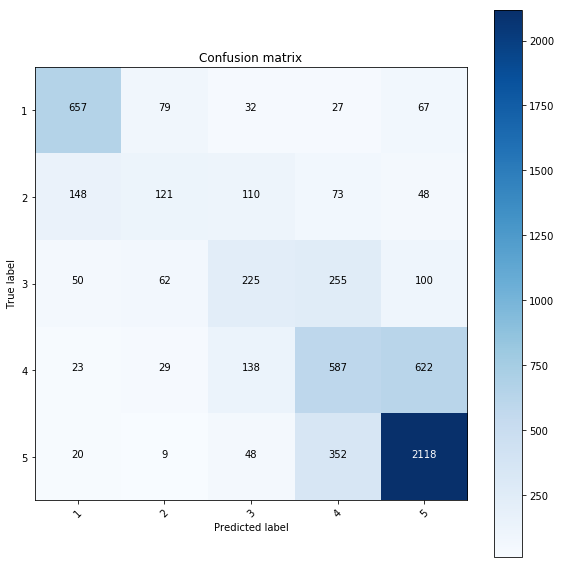

In [45]:
plot_confusion_matrix(confusion_matrix(y_test, preds.T), classes=['1', '2','3','4','5'], title='Confusion matrix')

In [46]:
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.76      0.75       862
           2       0.40      0.24      0.30       500
           3       0.41      0.33      0.36       692
           4       0.45      0.42      0.44      1399
           5       0.72      0.83      0.77      2547

    accuracy                           0.62      6000
   macro avg       0.54      0.52      0.52      6000
weighted avg       0.60      0.62      0.60      6000



Observation:
From above, we see that the f1-score for 1,2,3,4,5 star rating improved slightly as compared to the Naive Bias Model.

Thus in the above notebook, we have researched about the user rating prediction using Natural Language Processing on 
the review text by training our model using both Naive Bias Algorithm and Logistic Regression algorithm and comparing
both of them.

In [50]:
from sklearn.svm import LinearSVC
from datetime import datetime
# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
t1 = datetime.now()
classifier.fit(X_train, y_train)
print(datetime.now() - t1)

0:00:11.475314


C:\Users\bhanu\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.618


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.73      0.76      0.75       862
           2       0.40      0.24      0.30       500
           3       0.41      0.33      0.36       692
           4       0.45      0.42      0.44      1399
           5       0.72      0.83      0.77      2547

    accuracy                           0.62      6000
   macro avg       0.54      0.52      0.52      6000
weighted avg       0.60      0.62      0.60      6000



In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[ 657   79   32   27   67]
 [ 148  121  110   73   48]
 [  50   62  225  255  100]
 [  23   29  138  587  622]
 [  20    9   48  352 2118]]
